# Load the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-full.csv', sep=';')  # Adjust the path as needed


In [3]:
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Preprocessing

In [12]:
# Encoding categorical variables using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Split the dataset into features and target variable
X = df.drop('y_yes', axis=1)  # Assuming 'y' is the target variable
y = df['y_yes']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[7344  608]
 [ 563  528]]


In [23]:
# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      7952
        True       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



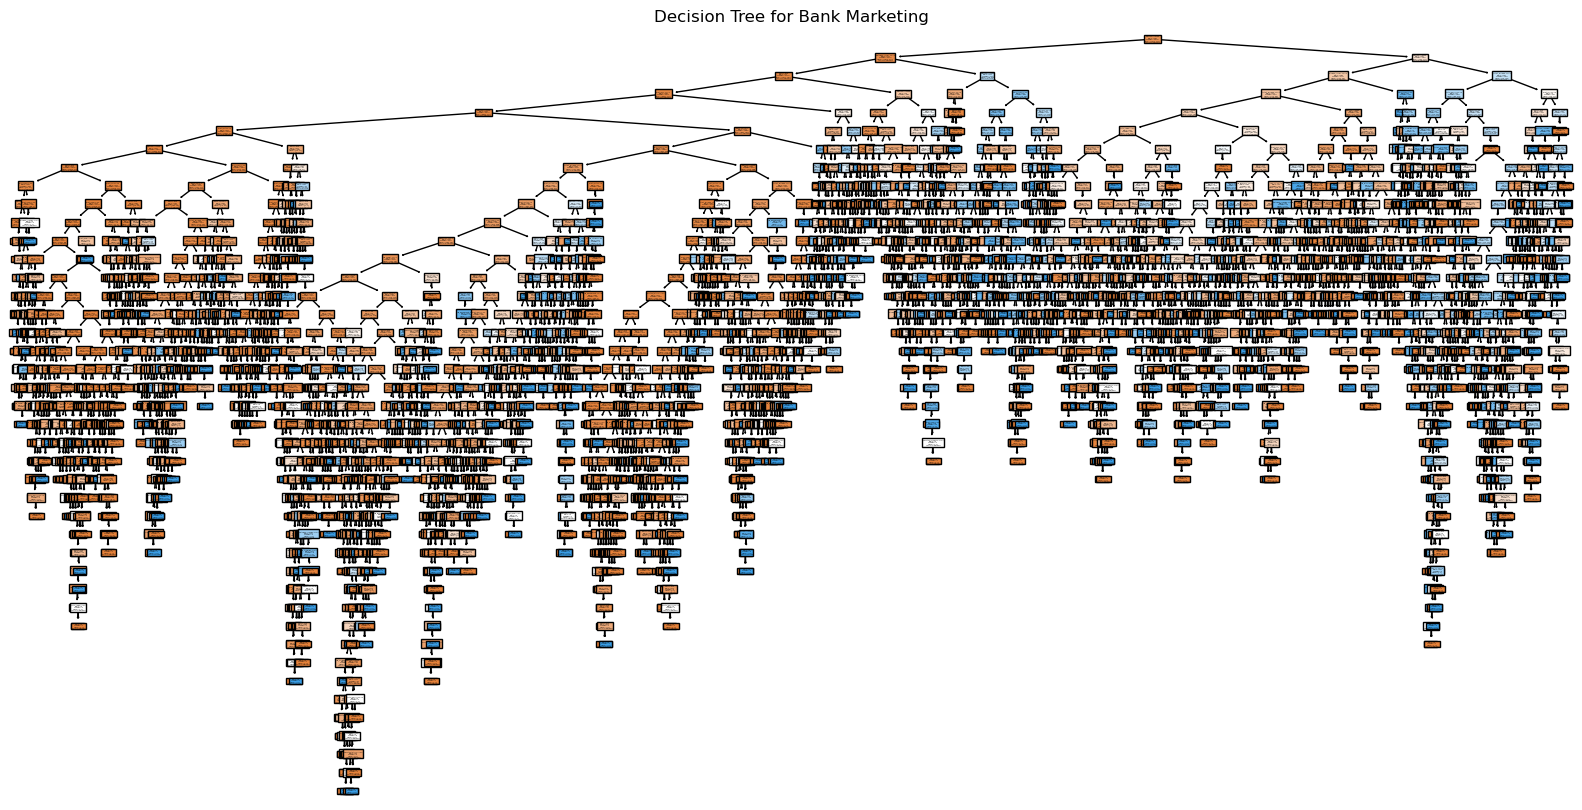

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.title('Decision Tree for Bank Marketing')
plt.show()

#To identify whether a customer will purchase a product or service using the decision tree model


# Make Predictions on New Data

In [43]:
# Create a new customer record with all necessary features
new_customer = pd.DataFrame({
    'age': [30],
    'job_admin.': [1],
    'job_blue-collar': [0],
    'job_entrepreneur': [0],
    'balance': [500],            # Example feature
    'campaign': [1],             # Example feature
    'contact_telephone': [1],    # Example feature
    'contact_unknown': [0],      # Example feature
    'day': [5],                  # Example feature
    # Include all other necessary features with appropriate values
})

# Make sure the column names match exactly
new_customer = new_customer.reindex(columns=X_train.columns, fill_value=0)

# Predict whether this customer will purchase
purchase_prediction = clf.predict(new_customer)
print('Will the customer purchase?:', 'Yes' if purchase_prediction[0] == 1 else 'No')


Will the customer purchase?: No


In [37]:
#Check the Feature Names in the Training Data

In [39]:
print(X_train.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [41]:
# Create a new customer with all required features
new_customer = pd.DataFrame({
    'age': [30],
    'job_admin.': [1],
    'job_blue-collar': [0],
    'job_entrepreneur': [0],
    'balance': [500],
    'campaign': [1],
    'contact_telephone': [1],
    'contact_unknown': [0],
    'day': [5],
    'month_apr': [0],  # Assuming month columns were created through one-hot encoding
    'month_aug': [0],
    'month_dec': [0],
    'month_feb': [0],
    'month_jan': [0],
    'month_jul': [0],
    'month_jun': [0],
    'month_mar': [0],
    'month_may': [0],
    'month_nov': [0],
    'month_oct': [0],
    'month_sep': [0],
    'pdays': [999],
    'previous': [0],
    'poutcome_failure': [0],
    'poutcome_success': [1],
    'poutcome_unknown': [0],
})

# Reindex to match the training feature columns
new_customer = new_customer.reindex(columns=X_train.columns, fill_value=0)

# Predict purchase decision
purchase_prediction = clf.predict(new_customer)
print('Will the customer purchase?:', 'Yes' if purchase_prediction[0] == 1 else 'No')

Will the customer purchase?: No
